In [1]:
import spikeinterface.full as si

In [7]:
import probeinterface

base_dir = Path('groundtruth')

probe = probeinterface.read_prb(base_dir / 'mea_256.prb')
from pathlib import Path
from spikeinterface.sortingcomponents.peak_detection import detect_peaks



In [8]:
from spikeinterface.sortingcomponents.peak_detection import detect_peaks

In [9]:
def plot_juxta_amplitude(juxta_filename, peaks):
    juxta_sig = np.memmap(juxta_filename, dtype='float32')
    
    med = np.median(juxta_sig)
    mad = np.median(np.abs(juxta_sig-med))*1.4826
    thresh = med + 8*mad
    
    fig, axs = plt.subplots(nrows=2)

    count, bins = np.histogram(peaks['amplitude'], bins=np.arange(np.min(peaks['amplitude']), 0,  0.5))
    ax = axs[0]
    ax.plot(bins[:-1], count)
    ax.axvline(-thresh, color='r', ls='--')
    ax.axvline(med, color='k', ls='-')
    for i in range(1,6):
        ax.axvspan(med - i * mad, med + i * mad, color='k', alpha=0.05)
    
    fig.suptitle('juxta peak amplitude')
    
    ax = axs[1]
    ax.plot(peaks['sample_ind'], peaks['amplitude'], ls='None', marker='o')
    ax.axhline(-thresh, color='r', ls='--')
    for i in range(1,6):
        ax.axhspan(med - i * mad, med + i * mad, color='k', alpha=0.05)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

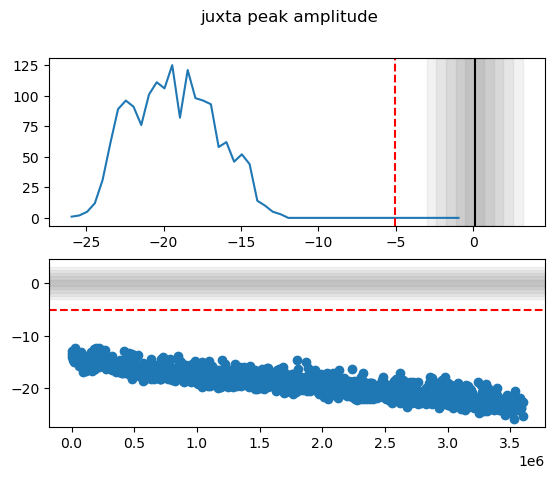

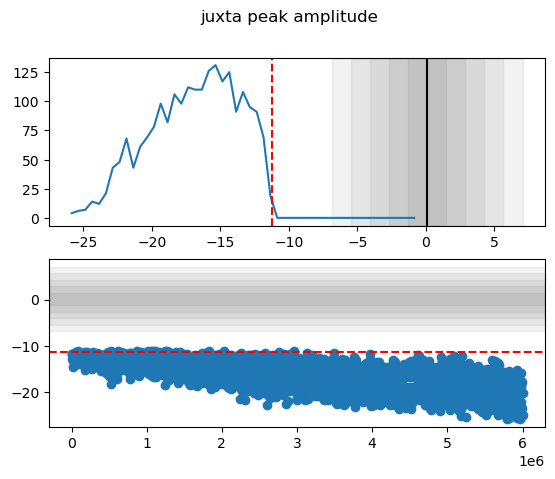

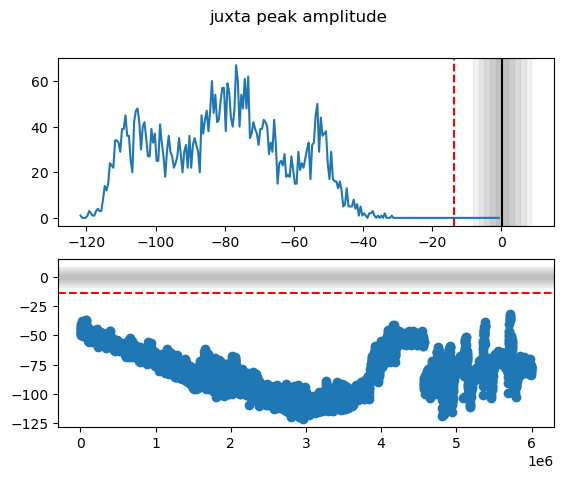

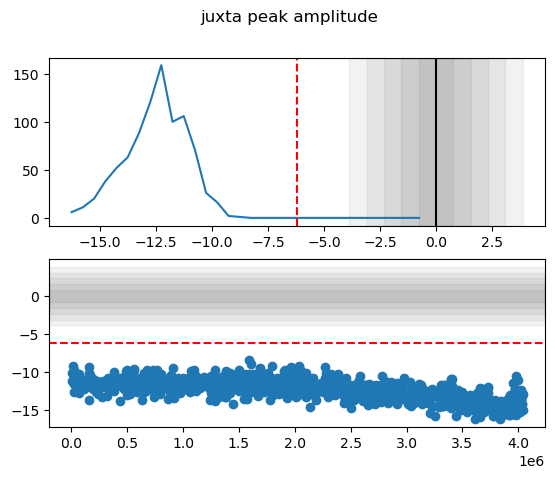

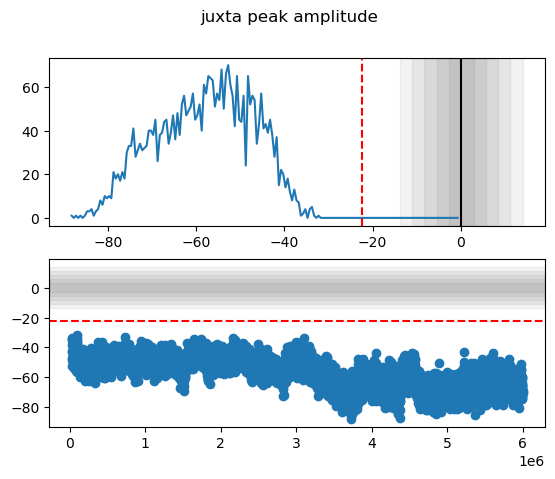

In [10]:
import os
recordings = {}
juxta = {}
peaks = {}
import numpy as np
import pylab as plt

for folder in os.listdir(base_dir / 'recordings'):
    file = base_dir / 'recordings' / folder / folder
    recording = si.read_mcsraw(str(file) + '.raw')
    recording.annotate(is_filtered=True)
    recording = recording.set_probegroup(probe)
    recordings[folder] = recording
    juxta[folder] = si.read_binary(str(file) + '.juxta.raw', sampling_frequency=20000, num_chan=1, dtype='float32')
    peaks[folder] = detect_peaks(juxta[folder], exclude_sweep_ms=2, detect_threshold=8)
    plot_juxta_amplitude(str(file) + '.juxta.raw', peaks[folder])

In [11]:
waveforms = {}
for folder in os.listdir(base_dir / 'recordings'):
    file = base_dir / 'waveforms' / folder
    times = peaks[folder]['sample_ind']
    sorting = si.NumpySorting.from_times_labels(times, np.zeros(len(times)), sampling_frequency=20000)
    waveforms[folder] = si.extract_waveforms(recordings[folder], sorting, folder=file, n_jobs=-1, overwrite=True, chunk_memory="10M")

/home/pierre/github/spikeinterface/spikeinterface/core/waveform_extractor.py:259: UserWarning: Sorting object is not dumpable, which might result in downstream errors for parallel processing. To make the sorting dumpable, use the `sorting.save()` function.
  warn("Sorting object is not dumpable, which might result in downstream errors for "


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [45]:
channel_positions = recordings['20160415_patch2'].get_channel_locations()
#real_positions = {'20160426_patch3' : channel_positions[226] + [0, -10],
#                  '20170726_patch1' : (0.9*channel_positions[30] + 0.1*channel_positions[3] + [5, 0]),
#                  '20170728_patch2' : channel_positions[118] + [0, 5],
#                  '20160426_patch2' : channel_positions[200] + [-15, -15], 
#                  '20160415_patch2' : (channel_positions[69] + channel_positions[33])/2.}

real_positions = {'20160426_patch3' : channel_positions[226] + [2, -5],
                  '20170726_patch1' : channel_positions[30] + [6,6],
                  '20170728_patch2' : channel_positions[118] + [-2,9],
                  '20160426_patch2' : channel_positions[200] + [-18, -12], 
                  '20160415_patch2' : channel_positions[69] +  [3,-15]}

In [89]:
%matplotlib inline

unit_positions = {}
spikes_positions = {}

import matplotlib.image as mpimg

for folder in  os.listdir(base_dir / 'recordings'):
    unit_positions[folder] = {}
    spikes_positions[folder] = {}
    for method in ['center_of_mass', 'monopolar_triangulation']:
        if method == 'center_of_mass':
            for feature in ['ptp', 'energy', 'v_origin']:
                title = f'CoM ({feature})'
                params = {'feature' : feature}
                
                unit_positions[folder][title] = si.compute_unit_locations(waveforms[folder], method=method, 
                                                            **params)
                spikes_positions[folder][title] = si.compute_spike_locations(waveforms[folder], method=method, 
                                                                          method_kwargs=params, n_jobs=-1,
                                                                        chunk_memory="10M", outputs='by_unit')
                
        elif method == 'monopolar_triangulation':
            for do_decrease in [True, False]:
                if do_decrease:
                    title = f'Monopolar (with decrease)'
                else:
                    title =  f'Monopolar (without decrease)'
                params = {'enforce_decrease': do_decrease}
        
                unit_positions[folder][title] = si.compute_unit_locations(waveforms[folder], method=method, 
                                                            **params)
            
                spikes_positions[folder][title] = si.compute_spike_locations(waveforms[folder], method=method, 
                                                                          method_kwargs=params, n_jobs=-1,
                                                                        chunk_memory="10M", outputs='by_unit')

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

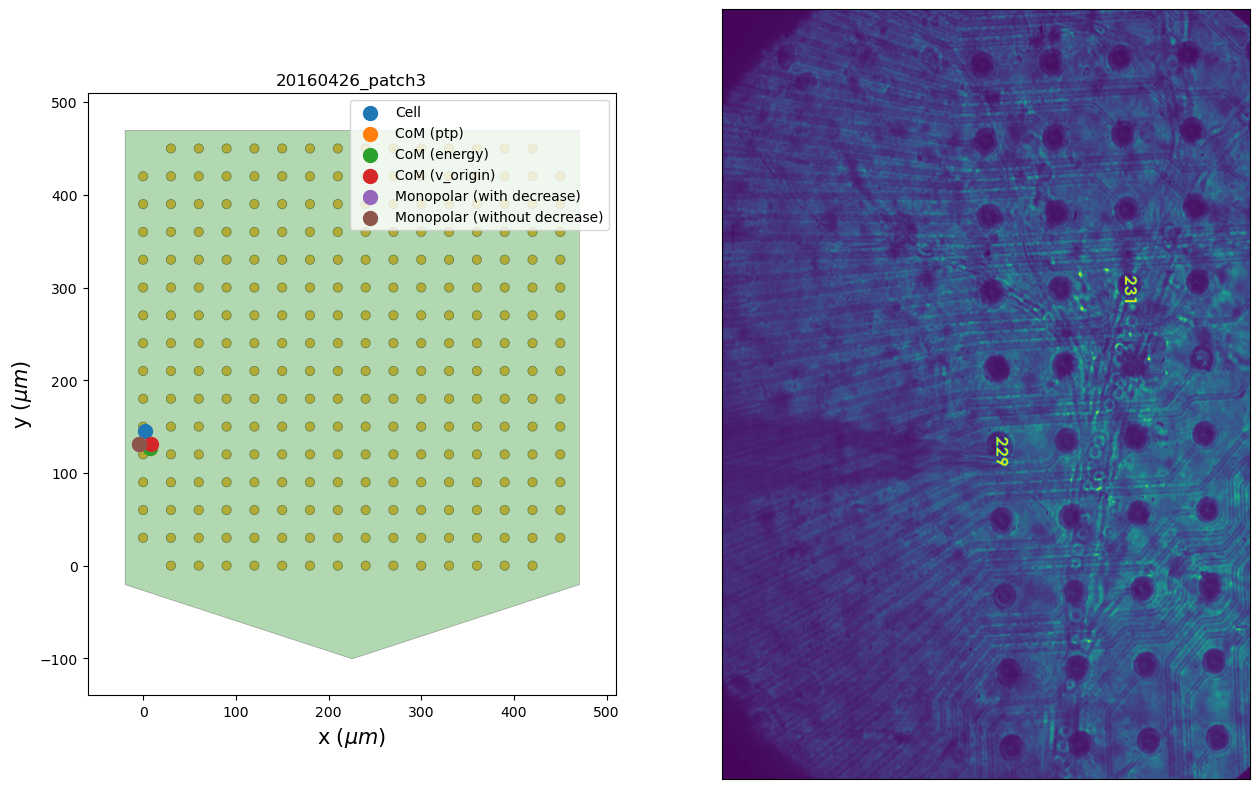

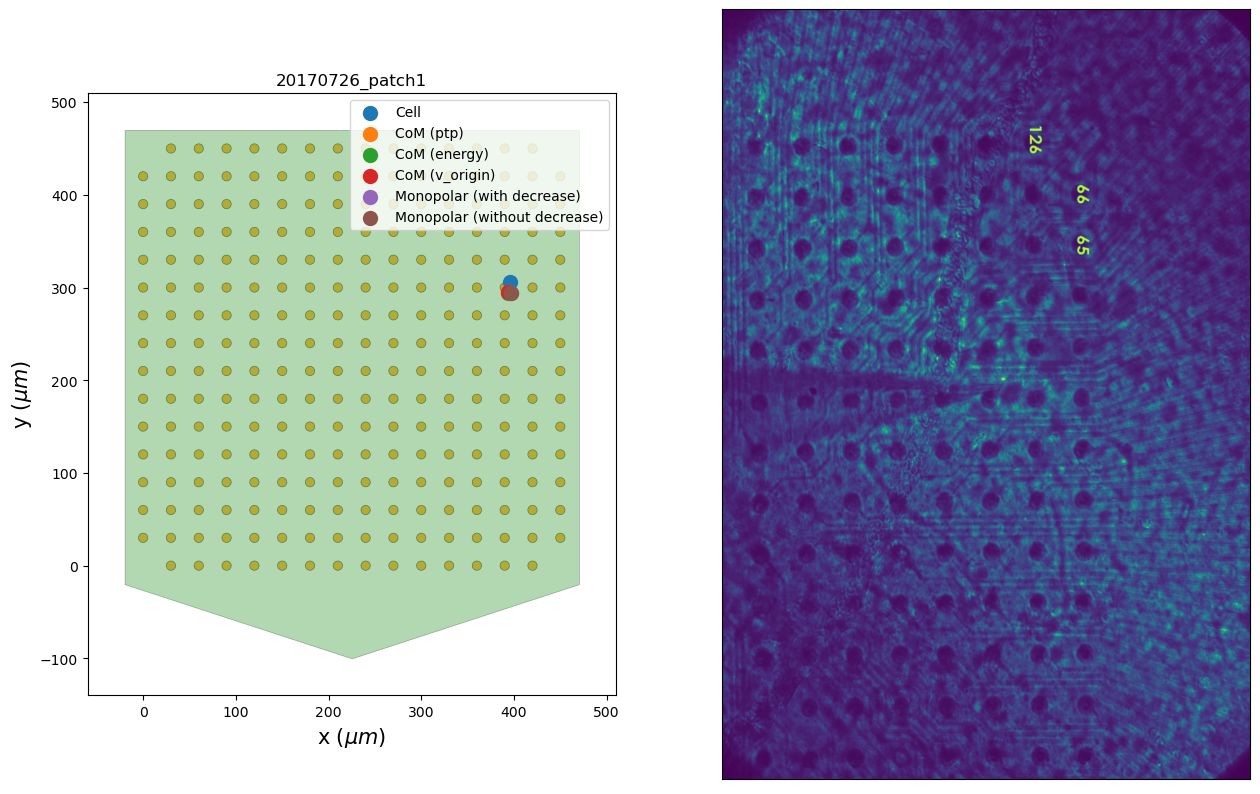

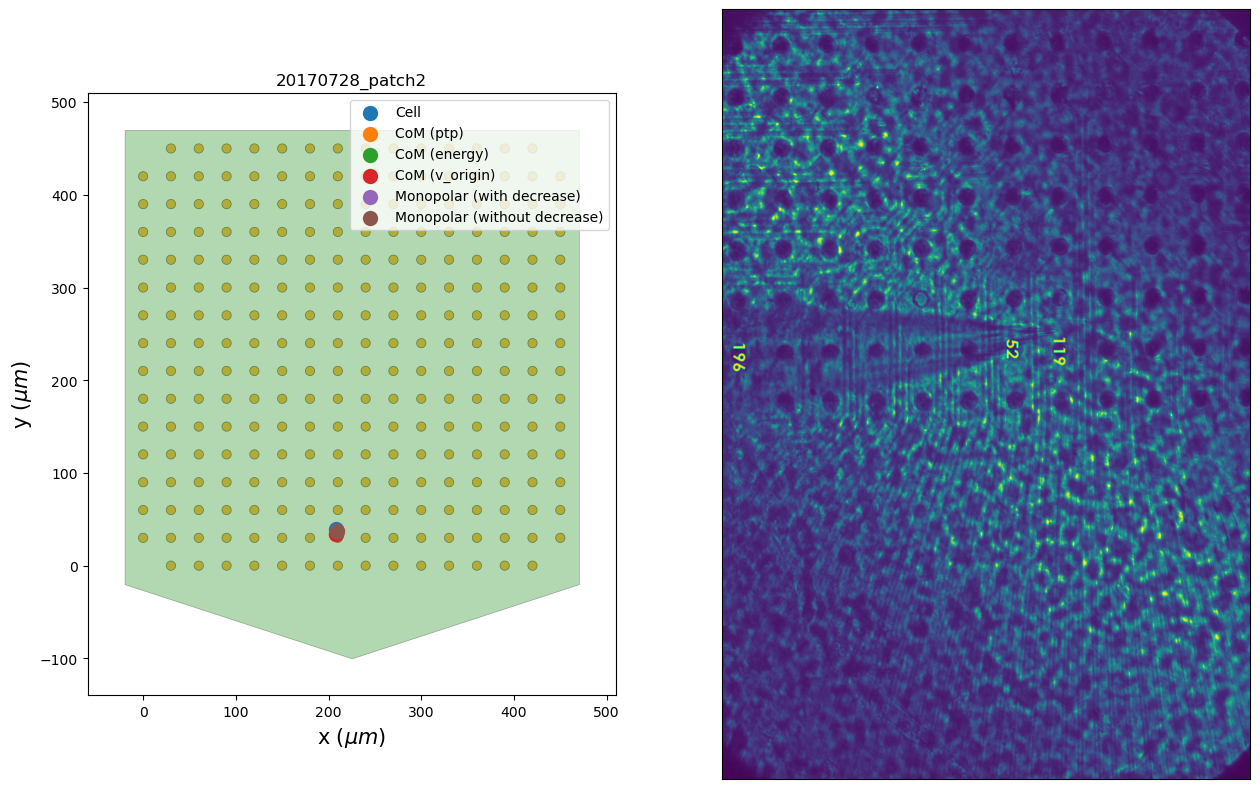

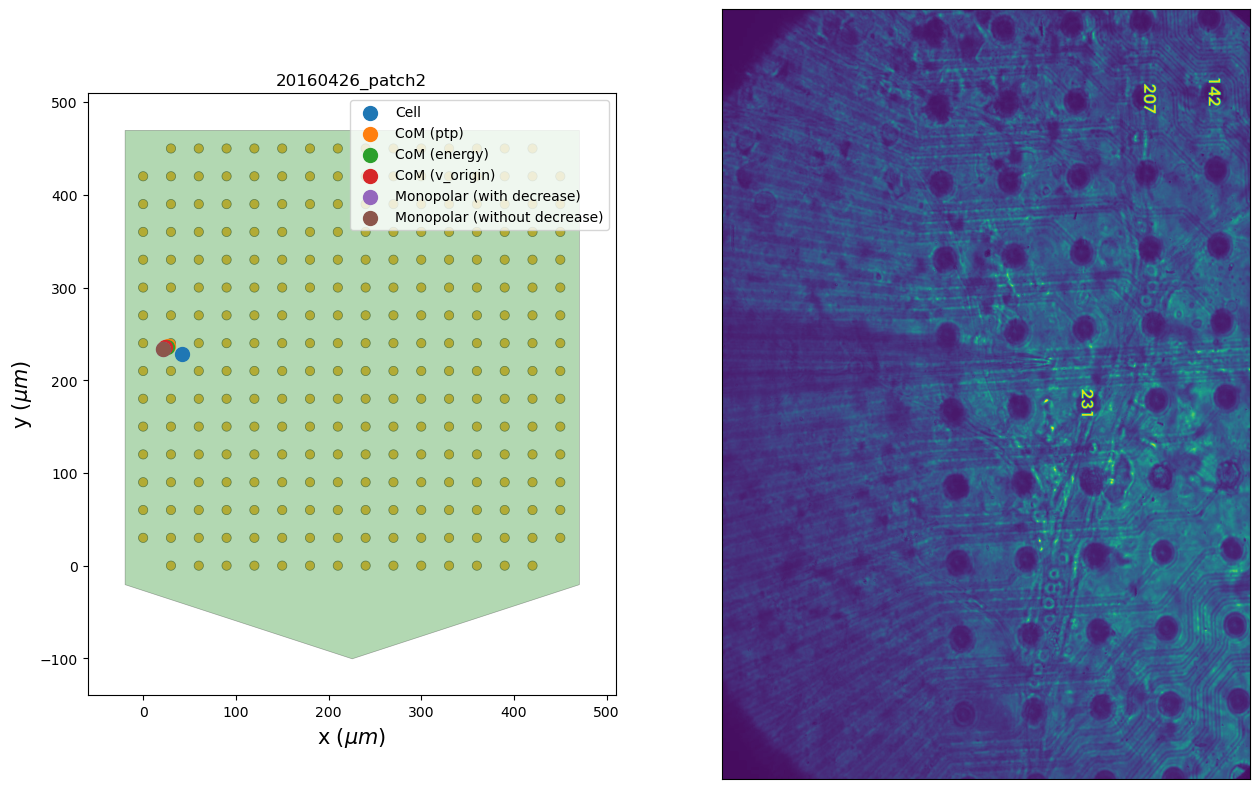

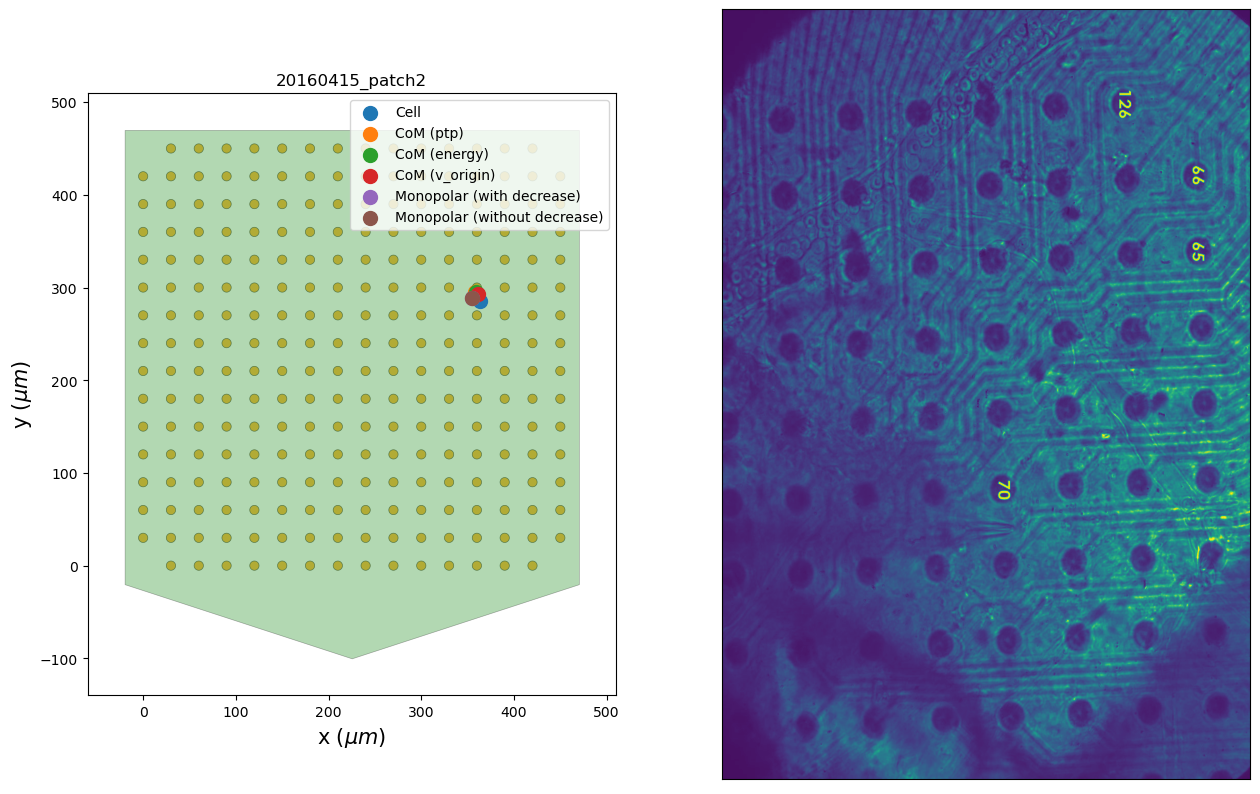

In [103]:
%matplotlib inline

import matplotlib.image as mpimg

for folder in  os.listdir(base_dir / 'recordings'):
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
    si.plot_probe_map(recording, ax=axes[0])
    
    #count = 0
    #for key, value in spikes_positions[folder].items():
    #    axes[0].scatter(value[0][0.0]['x'], value[0][0.0]['y'], alpha=0.01, c=f'C{count}')
    #    count += 1
        
    axes[0].scatter([real_positions[folder][0]], [real_positions[folder][1]], s=100, label='Cell')
    for key, value in unit_positions[folder].items(): 
        axes[0].scatter([value[0][0]], [value[0][1]], s=100, label=key)
    
    axes[0].legend()
    
    file = base_dir / 'recordings' / folder / folder
    img = mpimg.imread(f'{file}.jpg')
    imgplot = axes[1].imshow(img, aspect='auto')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[0].set_title(folder)

In [57]:
def _simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


In [113]:
res_unit = {}
res_spikes = {}
for folder in real_positions.keys():
    for key in unit_positions[folder].keys():
        if key not in res_unit:
            res_unit[key] = []
            res_spikes[key] = []
        res_unit[key] += [np.linalg.norm(real_positions[folder] - unit_positions[folder][key][0, :2])]
        
        data = spikes_positions[folder][key][0][0.0]
        errors = np.sqrt((data['x'] - real_positions[folder][0])**2 + (data['y'] - real_positions[folder][1])**2)
        res_spikes[key] += list(errors)


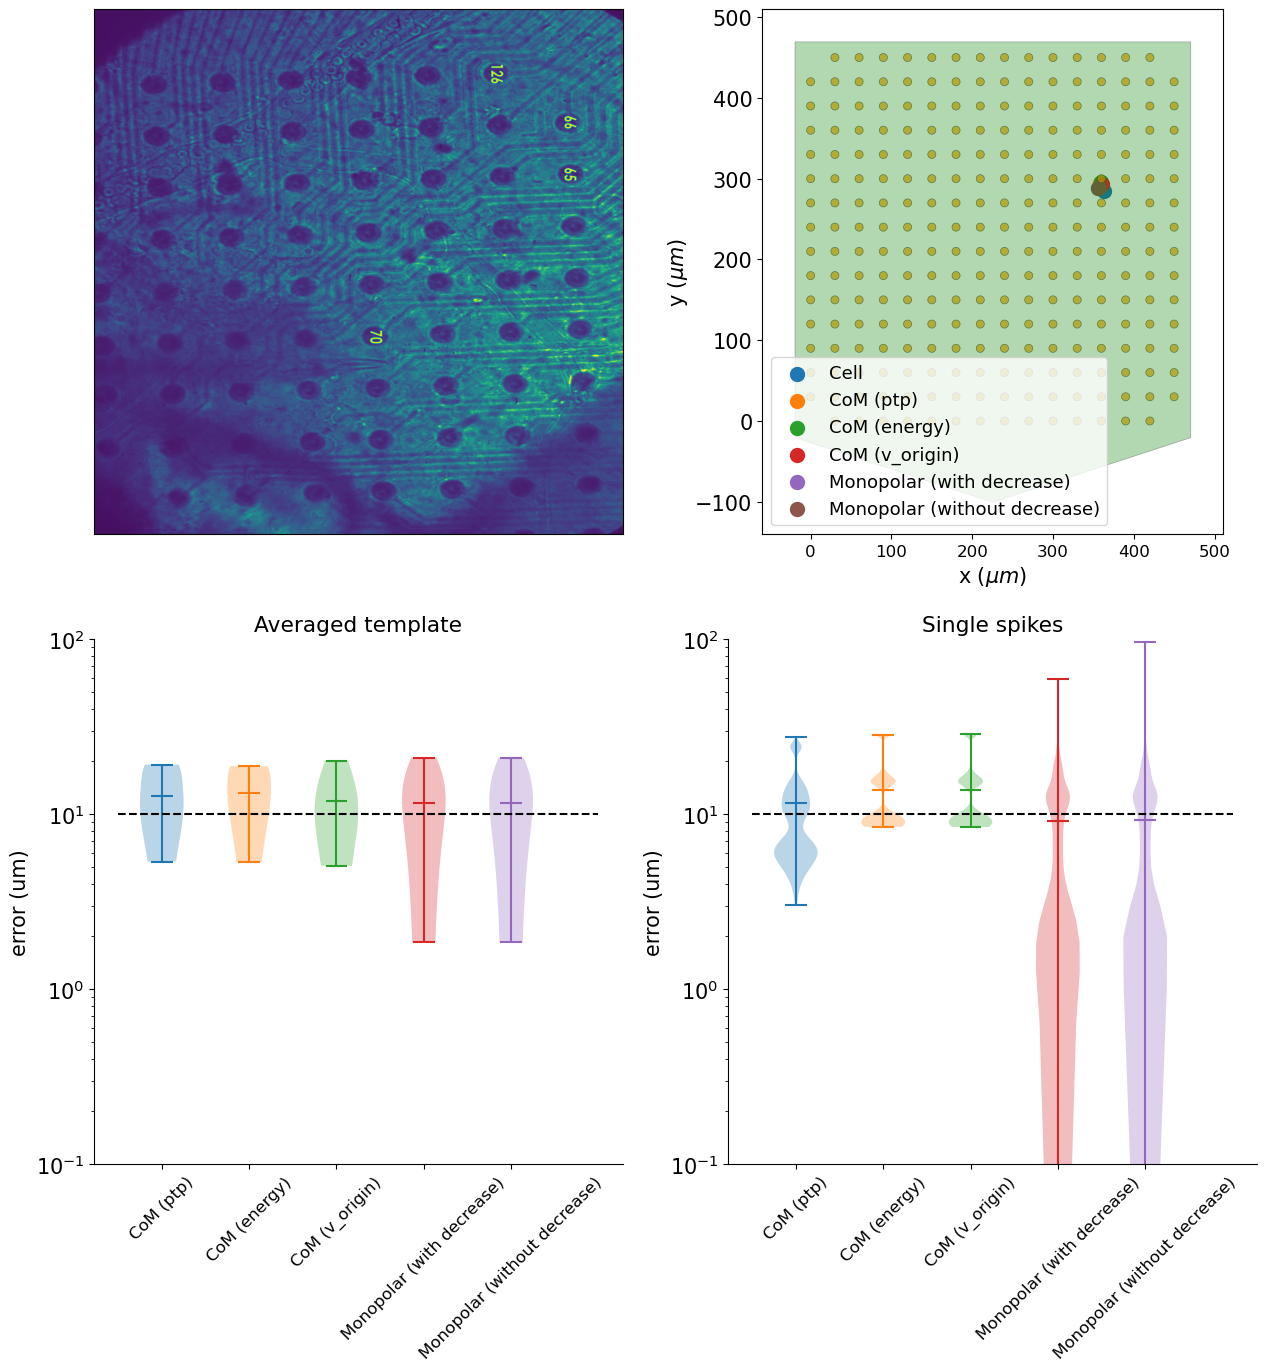

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.rc('font', size=13)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

file = base_dir / 'recordings' / '20160415_patch2' / '20160415_patch2'
img = mpimg.imread(f'{file}.jpg')
imgplot = axes[0, 0].imshow(img, aspect='auto')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

axes[0, 1].scatter([real_positions[folder][0]], [real_positions[folder][1]], s=100, label='Cell')
for key, value in unit_positions[folder].items(): 
    axes[0, 1].scatter([value[0][0]], [value[0][1]], s=100, label=key)
axes[0, 1].legend()
si.plot_probe_map(recording, ax=axes[0, 1])

for count, value in enumerate(res_unit.values()):
    axes[1, 0].violinplot(value, [count], showmeans=True)

_simpleaxis(axes[1, 0])
axes[1, 0].set_xticks(np.arange(len(res.keys())), res.keys(), rotation=45)
axes[1, 0].set_ylabel('error (um)')
axes[1, 0].set_title('Averaged template')
axes[1, 0].set_ylim(0.1, 100)
axes[1, 0].set_yscale('log')
axes[1, 0].plot([-0.5, len(res.keys())], [10, 10], 'k--')


for count, value in enumerate(res_spikes.values()):
    axes[1, 1].violinplot(value, [count], showmeans=True)

axes[1, 1].set_yscale('log')
_simpleaxis(axes[1, 1])
axes[1, 1].set_xticks(np.arange(len(res.keys())), res.keys(), rotation=45)
axes[1, 1].set_ylabel('error (um)')
axes[1, 1].set_title('Single spikes')
axes[1, 1].set_ylim(0.1, 100)
axes[1, 1].set_yscale('log')
axes[1, 1].plot([-0.5, len(res.keys())], [10, 10], 'k--')


plt.savefig('gt.pdf')


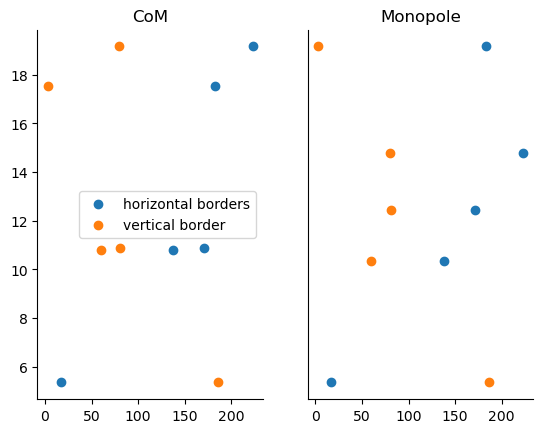

In [48]:
xdist = []
ydist = []
for key in real_positions.keys():
    xdist += [real_positions[key][0]]
    ydist += [real_positions[key][1]]

fig, ax = plt.subplots(1, 2) 
ax[0].scatter(np.abs(450//2 - np.array(xdist)), res['com'], label='horizontal borders')
ax[0].scatter(np.abs(450//2 - np.array(ydist)), res['com'], label='vertical border')
ax[1].set_yticks([])
_simpleaxis(ax[0])
ax[1].set_title('Monopole')
ax[0].set_title('CoM')
ax[0].legend()


ax[1].scatter(np.abs(450//2 - np.array(xdist)), res['mon'])
ax[1].scatter(np.abs(450//2 - np.array(ydist)), res['mon'])
_simpleaxis(ax[1])
